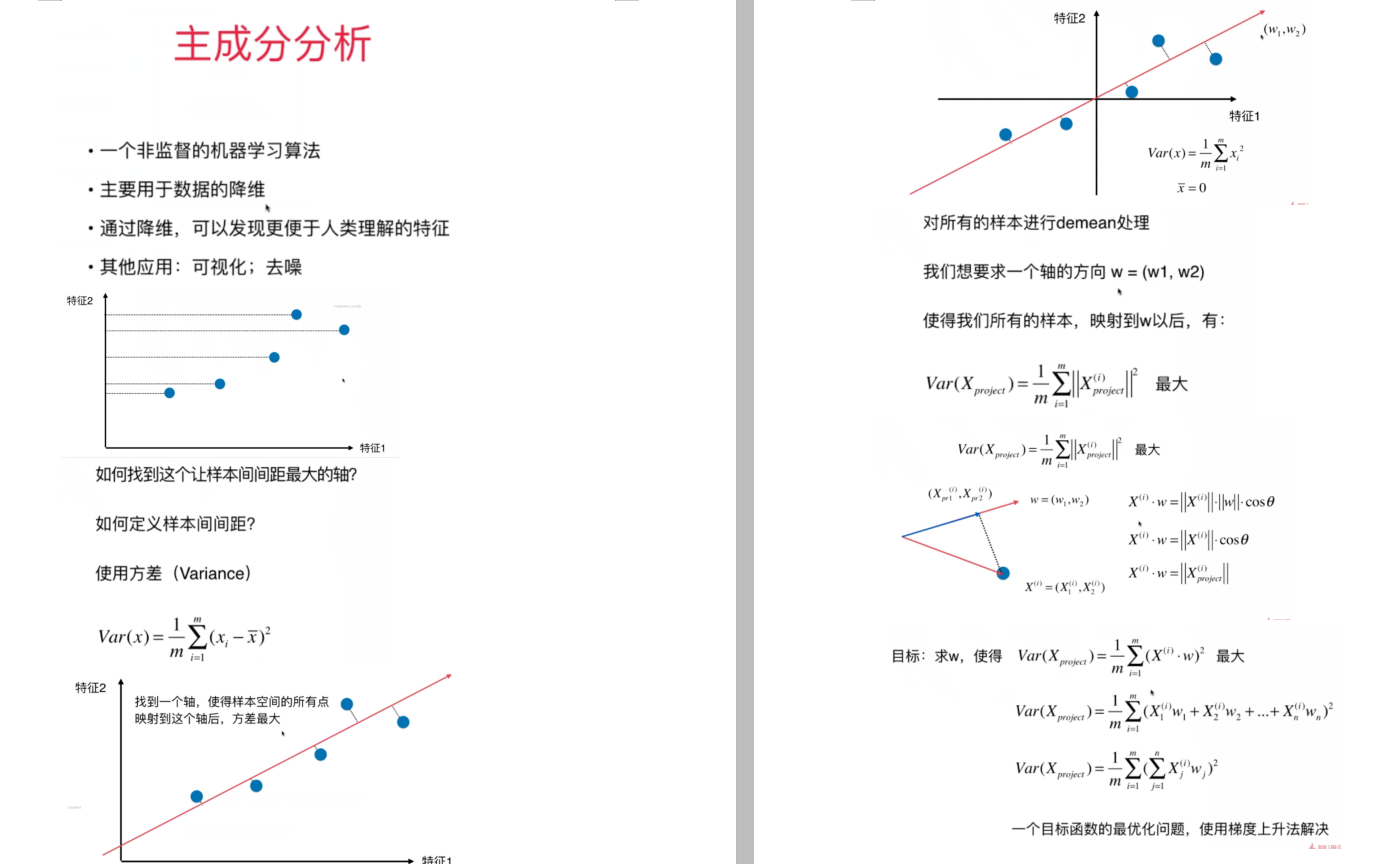

In [1]:
from IPython.display import Image
Image(filename=r"image/x1.png")

注意区分线性回归

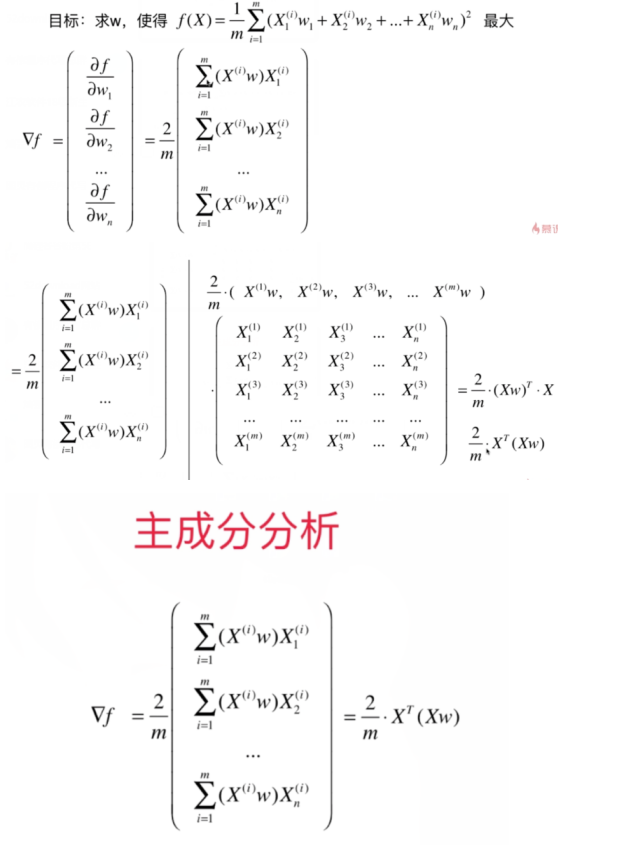

In [2]:
from IPython.display import Image
Image(filename=r"image/x2.png")

# 使用梯度上升法求解主成分

In [3]:
import numpy as np

import matplotlib.pyplot as plt

In [4]:
# 分配两位数据空间
X = np.empty((100,2))
# 第一维
X[:,0] = np.random.uniform(0., 100., size=100)
# 第二维
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

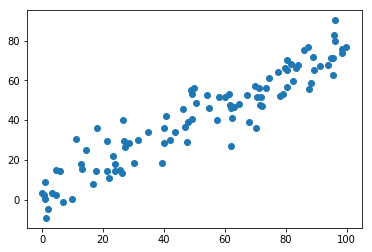

In [5]:
plt.scatter(X[:,0], X[:,1])

In [6]:
def demean(X):
    return X - np.mean(X, axis=0)

In [7]:
X_demean = demean(X)

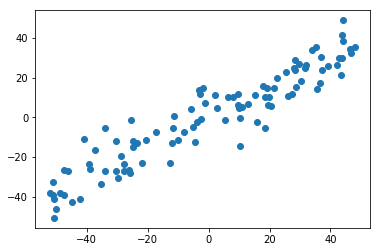

In [8]:
plt.scatter(X_demean[:,0], X_demean[:,1])

In [9]:
np.mean(X_demean[:,0])

-5.684341886080802e-15

In [10]:
np.mean(X_demean[:,1])

4.476419235288631e-15

# 梯度上升法

In [11]:
def f(w, X):
    return np.sum((X.dot(w)**2) / len(X))

In [12]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [13]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
        
    return res

In [14]:
# 求单位方向
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = f(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)# 注意：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
        
        return w

In [15]:
initial_w = np.random.random(X.shape[1]) # 注意：不能用0向量开始
initial_w

array([0.74438227, 0.76733561])

In [16]:
eta = 0.001

In [17]:
# 注意：不能使用StandardScaler标准化数据

In [18]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.7034849 , 0.71071021])

In [20]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

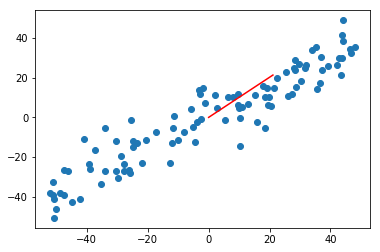

In [21]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0,w[1]*30], color="r")